In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

In [2]:
file_path = '/content/OxCGRT_summary.xlsx'
#df = pd.read_excel('/content/summary.xlsx')
dfs = pd.read_excel(file_path, sheet_name=None, engine='openpyxl')

In [3]:
for sheet_name, df in dfs.items():
    #df.isnull().count()
    null = df.isnull().sum()
    print(null)

country_name    0
country_code    0
22Jan2020       1
23Jan2020       1
24Jan2020       1
               ..
06May2020       1
07May2020       1
08May2020       1
09May2020       1
10May2020       1
Length: 112, dtype: int64
country_name    0
country_code    0
22Jan2020       1
23Jan2020       1
24Jan2020       1
               ..
06May2020       1
07May2020       1
08May2020       1
09May2020       1
10May2020       1
Length: 112, dtype: int64
country_name    0
country_code    0
22Jan2020       2
23Jan2020       2
24Jan2020       2
               ..
06May2020       3
07May2020       3
08May2020       3
09May2020       3
10May2020       3
Length: 112, dtype: int64


**replacing nan values with mean()**

In [4]:
# with pd.ExcelWriter("cleaned.xlsx") as writer:
#   for sheet_name, df in dfs.items():
#     df.isnull().count()
#     null = df.isnull().sum()
#     #print(null)
#     numeric_cols = df.select_dtypes(include=['number']).columns
#     mean_filled_df = df.copy()
#     mean_filled_df[numeric_cols] = mean_filled_df[numeric_cols].fillna(mean_filled_df[numeric_cols].mean())
#     print("Mean filled DataFrame:")
#     print(mean_filled_df)
#     print(df.isnull().sum())
#     #df = df.fillna(0)
#     mean_filled_df.to_excel(writer, sheet_name=sheet_name, index=False)

with pd.ExcelWriter("cleaned.xlsx") as writer:
    for sheet_name, df in dfs.items():
        null = df.isnull().sum()
#       #print(null)
        zero_filled_df = df.fillna(0)
        zero_filled_df.to_excel(writer, sheet_name=sheet_name, index=False)

**Q4. The heatmap in Figure 2 below (created by John Hopkins) shows the NEW
DAILY confirmed cases of COVID-19 between 20th March and 10th April 2020.
a) The data given to you in OxCGRT_summary.xlsx reports the total number of
confirmed cases on daily basis, use this data to calculate the NEW DAILY
confirmed cases for the period between 20th March and 10th April 2020.
(10 marks)
** **bold text**

In [5]:
data = pd.read_excel("/content/cleaned.xlsx")

dates = data.columns[2:]
countries = data["country_name"]
confirmed_cases = data.iloc[:, 2:]

dates = pd.to_datetime(dates, format='%d%b%Y')

start_date_index = dates.get_loc(pd.Timestamp('2020-03-19'))
end_date_index = dates.get_loc(pd.Timestamp('2020-04-10'))

new_cases = confirmed_cases.iloc[:, start_date_index:end_date_index+1].diff(axis=1).fillna(0)
# new_cases.iloc[:, 0] = confirmed_cases.iloc[:, start_date_index]

# Replace negative values with zeros
new_cases[new_cases < 0] = 0

new_daily_cases = pd.DataFrame({
    'country_name': countries,
    'country_code': data["country_code"],
    **{str(date.date()): new_cases.iloc[:, i] for i, date in enumerate(dates[start_date_index:end_date_index+1])}
})
new_daily_cases = new_daily_cases.drop(['2020-03-19'], axis=1)
new_daily_cases.columns
# new_daily_cases.to_excel("New_Daily_Confirmed_Cases.xlsx")
print(new_daily_cases)

     country_name country_code  2020-03-20  2020-03-21  2020-03-22  \
0           Aruba          ABW           1           0           4   
1     Afghanistan          AFG           0           0          10   
2          Angola          AGO           1           1           0   
3         Albania          ALB           6           6          13   
4         Andorra          AND          22          13          25   
..            ...          ...         ...         ...         ...   
182       Vanuatu          VUT           0           0           0   
183         Yemen          YEM           0           0           0   
184  South Africa          ZAF          52          38          34   
185        Zambia          ZMB           0           0           1   
186      Zimbabwe          ZWE           1           2           0   

     2020-03-23  2020-03-24  2020-03-25  2020-03-26  2020-03-27  ...  \
0             0           3           5          11           5  ...   
1             6

**4b) Create a heatmap similar to Figure2 based on the derived variable NEW
DAILY confirmed cases calculated in (a) for the 10 countries that have the
highest number of confirmed cases on 10th April.
(20 marks)**

<ipython-input-6-573b93d04f01>:25: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


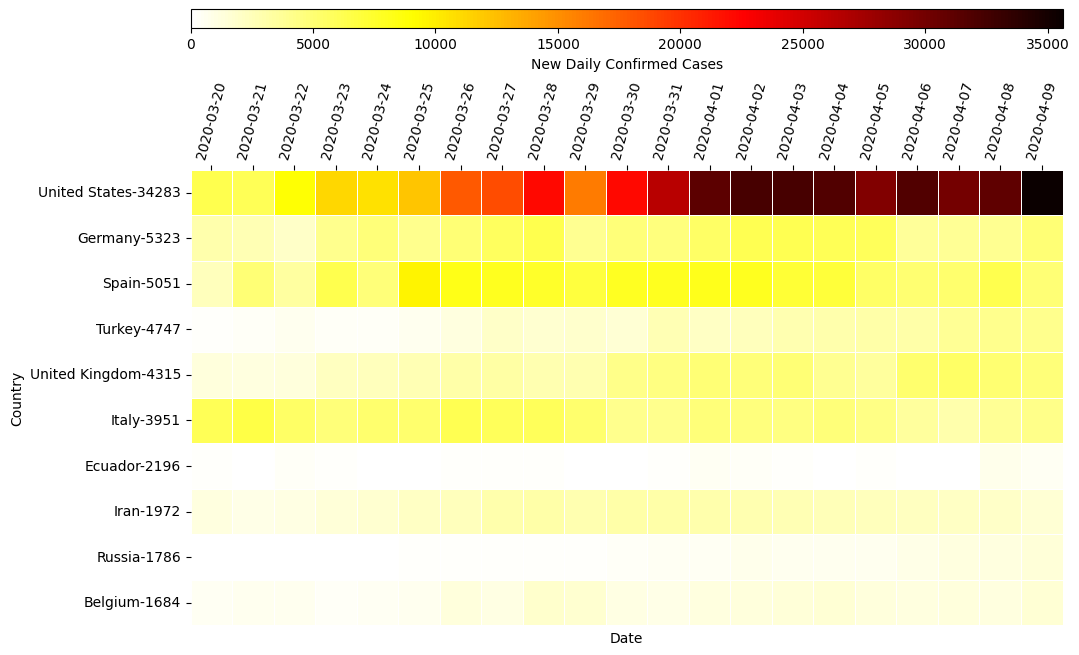

In [6]:

data_sorted = new_daily_cases.sort_values(by='2020-04-10', ascending=False)
top_10_countries = data_sorted.head(10)

top_10_countries = top_10_countries.drop(['country_code'], axis=1)
#top_10_countries['Total'] = top_10_countries['2020-04-10']

top_10_countries_transposed = top_10_countries.set_index(['country_name','2020-04-10'])

fig = plt.figure(figsize=(15, 8))
gs = GridSpec(2, 2, width_ratios=[15, 1], height_ratios=[1, 25], hspace=0.6, wspace=0.5)

ax = fig.add_subplot(gs[1, 0])
heatmap = sns.heatmap(top_10_countries_transposed, cmap='hot_r', linewidths=.5, cbar=False)
#plt.title("New Daily Confirmed Cases for the Top 10 Countries on April 10th, 2020")
plt.xlabel("Date")
plt.ylabel("Country")
ax.xaxis.tick_top()
#ax.invert_yaxis()
plt.xticks(rotation=75)

cbar_ax = fig.add_subplot(gs[0, 0])
cbar = fig.colorbar(mappable=heatmap.collections[0],  cax=cbar_ax, orientation='horizontal')
cbar.set_label('New Daily Confirmed Cases')

plt.tight_layout()
plt.show()


**5. Figure 3 below shows the US compared with the rest of the world on May 1st.Write a code to create a similar figure based on data from 10th May 2020. The population can be taken from Figure 3 but the total confirmed cases and deaths must be calculated based on the data from the excel file.
(15 marks)**

In [7]:

dfs1 = pd.read_excel('/content/cleaned.xlsx', sheet_name=None, engine='openpyxl')
for sheet_name, df in dfs.items():
    print(f"Data from {sheet_name}:")
    #print(df)
    print(df['10May2020'].sum())


Data from confirmedcases:
4095274.0
Data from confirmeddeaths:
294250.0
Data from stringencyindex:
13879.21


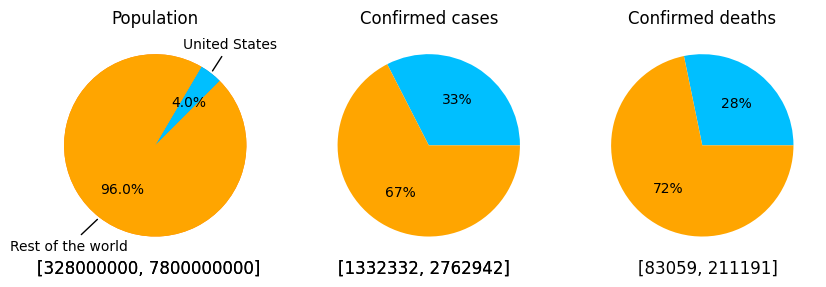

In [8]:
# fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))
#fig, (ax,ax2,ax3) = plt.subplots(1,3,figsize=(10,10), subplot_kw=dict(aspect="equal"))
fig, (ax,ax2,ax3) = plt.subplots(1,3,figsize=(10,10))
label = ['United States', 'Rest of the world']
quantity = [328000000,7800000000]
import numpy as np
wedges, texts = ax.pie(quantity, startangle=45)

ax.pie(quantity, colors=['#00BFFF', '#FFA500'],startangle=45, autopct='%1.1f%%')
for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2 + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    # connectionstyle = f"angle,angleA={30},angleB={0}"
    kw = dict(arrowprops=dict(arrowstyle="-"),zorder=4, va="center")
    ax.annotate(label[i], xy=(x, y), xytext=(0.3*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)
ax.set_title('Population')
for i, (size, label) in enumerate(zip(quantity, label)):
    plt.text(-7.3, -1.2 - 0.2 * 1, f"{quantity}", fontsize=12)

# labels2 = ['United states', 'Rest of the world']
quantity2 = [1332332, 2762942]
ax2.pie(quantity2,colors=['#00BFFF', '#FFA500'], autopct = '%1.0f%%')
ax2.set_title('Confirmed cases')

# labels3 = ['United states', 'Rest of the world']
quantity3 = [83059, 211191]
ax3.pie(quantity3,colors=['#00BFFF', '#FFA500'], autopct = '%1.0f%%') #plot first pie
ax3.set_title('Confirmed deaths')

for i, (size, label) in enumerate(zip(quantity2, label)):
    plt.text(-4, -1.2 - 0.2 * 1, f"{quantity2}", fontsize=12)

for i, (size, label) in enumerate(zip(quantity3, label)):
    plt.text(-0.7, -1.2 - 0.2 * 1, f"{quantity3}", fontsize=12)

plt.show()

In [9]:
## part 3

**Q6. Based on data published on 4
th May 2020, use scatter plot to visualise the
correlation between the total number of confirmed cases and the government
response represented by the stringency index for all countries with more than 1000
confirmed cases. The dot size (bubble size) should represent the number of
confirmed deaths. Logarithmic scale should be used to show the number of
COVID-19 cases on the X axis.(20 marks)**

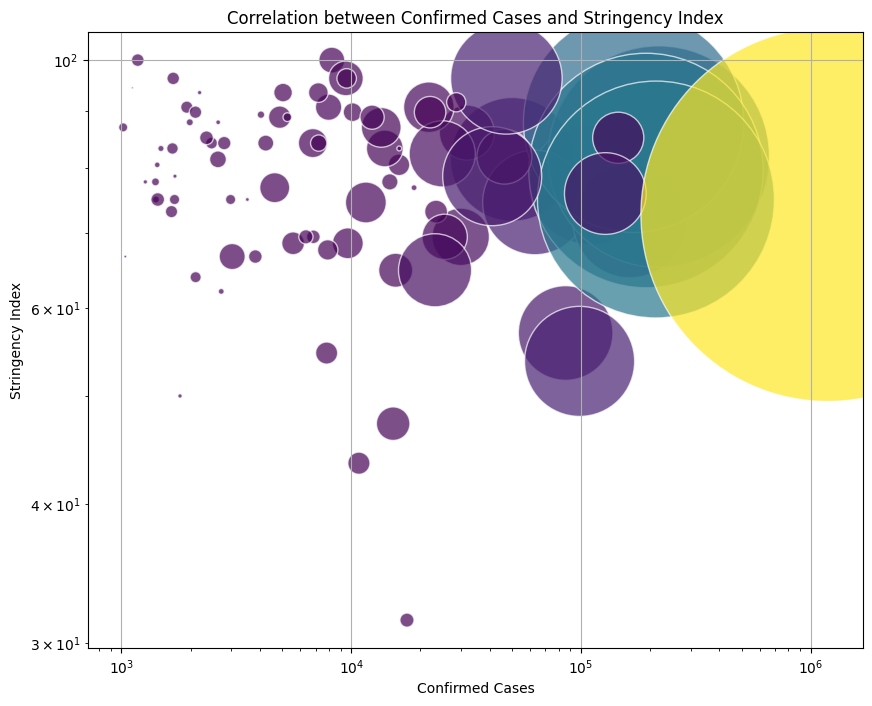

In [17]:
xls = pd.ExcelFile('/content/cleaned.xlsx')

dfs = {sheet_name: xls.parse(sheet_name) for sheet_name in xls.sheet_names}

confirmed_case = dfs['confirmedcases']
confirmed_death = dfs['confirmeddeaths']
stringency = dfs['stringencyindex']

filtered = confirmed_case['04May2020']
filtered1 = confirmed_death['04May2020']
filtered2 = stringency['04May2020']
country_name = confirmed_case['country_name']

filtered_data = confirmed_case[confirmed_case['04May2020'] > 1000]

corr = pd.DataFrame({'country_name': country_name, 'confirmed_cases': filtered, 'confirmed_deaths': filtered1, 'stringency_index': filtered2})

filtered_corr = corr[corr['confirmed_cases'] > 1000]

# # Plot bubble chart
plt.figure(figsize=(10, 8))
plt.scatter(filtered_corr['confirmed_cases'], filtered_corr['stringency_index'], s=filtered_corr['confirmed_deaths'], cmap='viridis', c=filtered_corr['confirmed_deaths'], alpha=0.7, edgecolors="white")
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Confirmed Cases')
plt.ylabel('Stringency Index')
plt.title('Correlation between Confirmed Cases and Stringency Index')
plt.grid(True)
plt.show()

In [12]:
print(filtered_corr)


             country_name  confirmed_cases  confirmed_deaths  stringency_index
1             Afghanistan             2469                72             84.26
5    United Arab Emirates            14730               137             77.78
6               Argentina             4887               260             88.89
7               Australia             6847                96             69.44
8                 Austria            15621               600             64.81
..                    ...              ...               ...               ...
171                Turkey           127659              3461             75.93
175               Ukraine            12331               303             88.89
177         United States          1185709             72365             72.69
178            Uzbekistan             2189                10             93.52
184          South Africa             7220               138             84.26

[88 rows x 4 columns]
